In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
price_df = pd.read_csv("house_pred.csv", sep="\\s+", header=None)

In [44]:
price_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [45]:
price_df.shape

(506, 14)

This seems to be a dataset from the famous boston dataset

In [46]:
price_df.columns = [
    'crim','zn','indus','chas','nox','rm','age',
    'dis','rad','tax','ptratio','b','lstate','medv'
]

In [47]:
price_df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstate,medv
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66,19.5
84,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247.0,18.5,396.90,9.62,23.9
249,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56,26.2
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287.0,19.6,396.90,6.87,23.1
442,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4


## Understanding the Dataset

- crim - it represents the crime rate
- zn- portion of residental land zoned for large lots, over 25,000 sq.ft
- indus - portion of non retail business
- chas - if near charles river or not
- nox - pollution level
- rm - available room
- age - the % of building before 1940
- dis - distance to job center
- rad - radius to main road
- tax - tax rate per $10,000
- ptratio - avg no. of student per teacher
- b - measure derived from the proportion of Black residents in the area
- lstate - lower status population
- medv - price of house in $1000's

Due to the 'b' column which is defined for the black resident portion this dataset is criticized and are against this dataset

In [48]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstate   506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [49]:
price_df.duplicated().sum()

np.int64(0)

So there is no null value + no duplicates & all are in int or float

In [50]:
price_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstate,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


If mean != median a lot, or min/max are very far, that hints skewness or outliers.
- so for crim, its mean is 3.6 which means most vals are around min but max is 88.9 hinting its right skewed
- zn, its mean - 11.3 and most vals min, 1st, median are 0 and max at 100 means highly skewed
- indus mean - 11.1, median - 9.6 and max 27.7 so somewhat balance
- chas is categorical
- nox is also somewhat balanced, rm too

In [51]:
for val in price_df.columns:
    print("Column", val, "has", price_df[val].nunique(), "unique values")

Column crim has 504 unique values
Column zn has 26 unique values
Column indus has 76 unique values
Column chas has 2 unique values
Column nox has 81 unique values
Column rm has 446 unique values
Column age has 356 unique values
Column dis has 412 unique values
Column rad has 9 unique values
Column tax has 66 unique values
Column ptratio has 46 unique values
Column b has 357 unique values
Column lstate has 455 unique values
Column medv has 229 unique values


In [52]:
price_df.to_csv("clean_boston.csv", index=False)

## EDA

<Axes: xlabel='medv'>

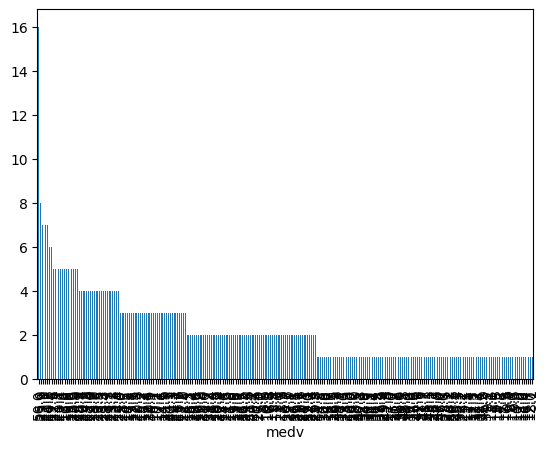

In [53]:
price_df['medv'].value_counts().plot(kind='bar')

So for continuous dataset the plot aren't the best choices

<Axes: xlabel='medv', ylabel='Count'>

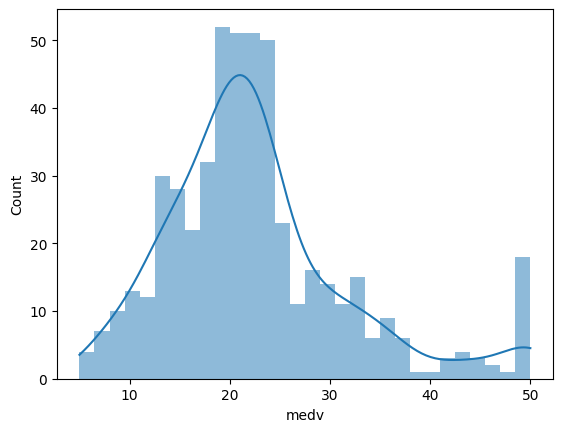

In [54]:
sns.histplot(price_df['medv'], bins=30, kde=True, edgecolor='None')

each interval is basically a block where calculation (min-max)/bins <br>
so if we count there are 30 blocks 

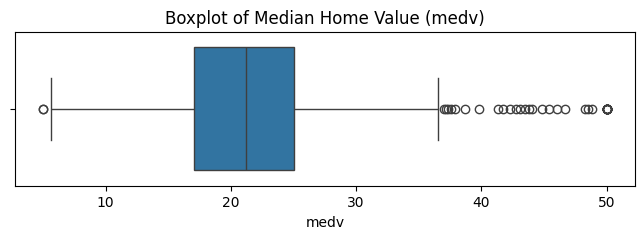

In [55]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=price_df['medv']) 
plt.title('Boxplot of Median Home Value (medv)')
plt.show()


so here the triu sets the upper triangle to true then in sns.heatmap where there are mask=True. They are hidden

In [82]:
price_df.corr()

,crim,zn,chas,nox,rm,tax,ptratio,lstate,medv
crim,1.000000,-0.200469,-0.055892,0.420972,-0.219247,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.042697,-0.516604,0.311991,-0.314563,-0.391679,-0.412995,0.360445
chas,-0.055892,-0.042697,1.000000,0.091203,0.091251,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.091203,1.000000,-0.302188,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,0.091251,-0.302188,1.000000,-0.292048,-0.355501,-0.613808,0.695360
tax,0.582764,-0.314563,-0.035587,0.668023,-0.292048,1.000000,0.460853,0.543993,-0.468536
ptratio,0.289946,-0.391679,-0.121515,0.188933,-0.355501,0.460853,1.000000,0.374044,-0.507787
lstate,0.455621,-0.412995,-0.053929,0.590879,-0.613808,0.543993,0.374044,1.000000,-0.737663
medv,-0.388305,0.360445,0.175260,-0.427321,0.695360,-0.468536,-0.507787,-0.737663,1.000000


<Axes: >

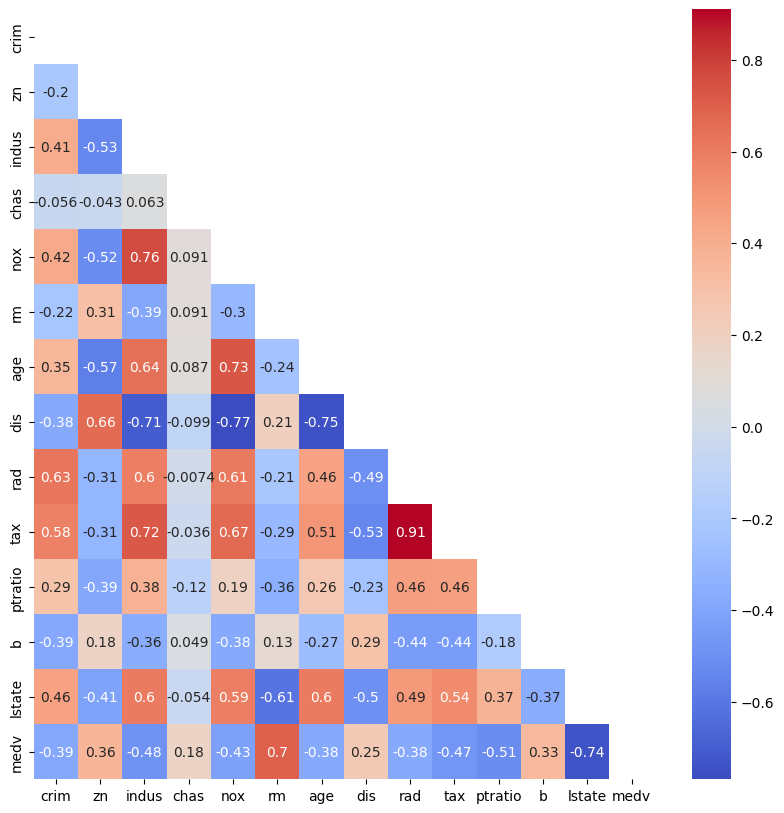

In [57]:
corr_col = price_df.corr()
mask = np.triu(np.ones_like(corr_col, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr_col, annot=True, cmap='coolwarm',mask=mask)

** Understanding **
- Here rm and lstate have high corr with midv. so keep it 
- tax and rad have very strong corr but with midv avg. So removing rad as tax can have more impact
- dis has high corr with indus,nox,age but with midv is weak so removing it
- remove the b as its ethically problematic

In [58]:
cols_to_drop = ['dis','rad','indus','b','age']
price_df.drop(columns=cols_to_drop, inplace=True)


<Axes: >

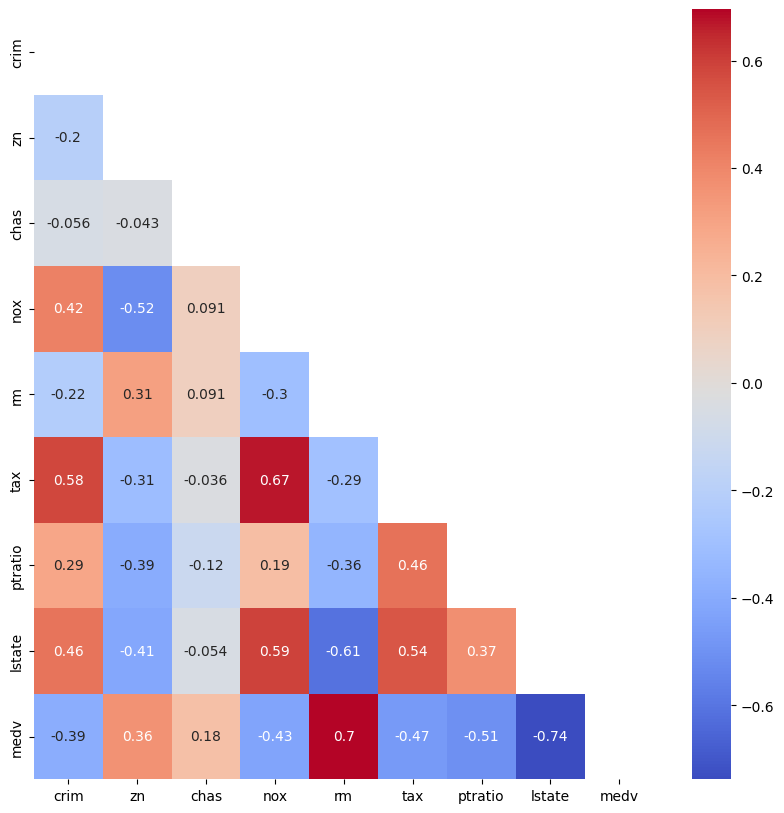

In [59]:
corr_col = price_df.corr()
mask = np.triu(np.ones_like(corr_col, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr_col, annot=True, cmap='coolwarm',mask=mask)

In [60]:
price_df.shape

(506, 9)

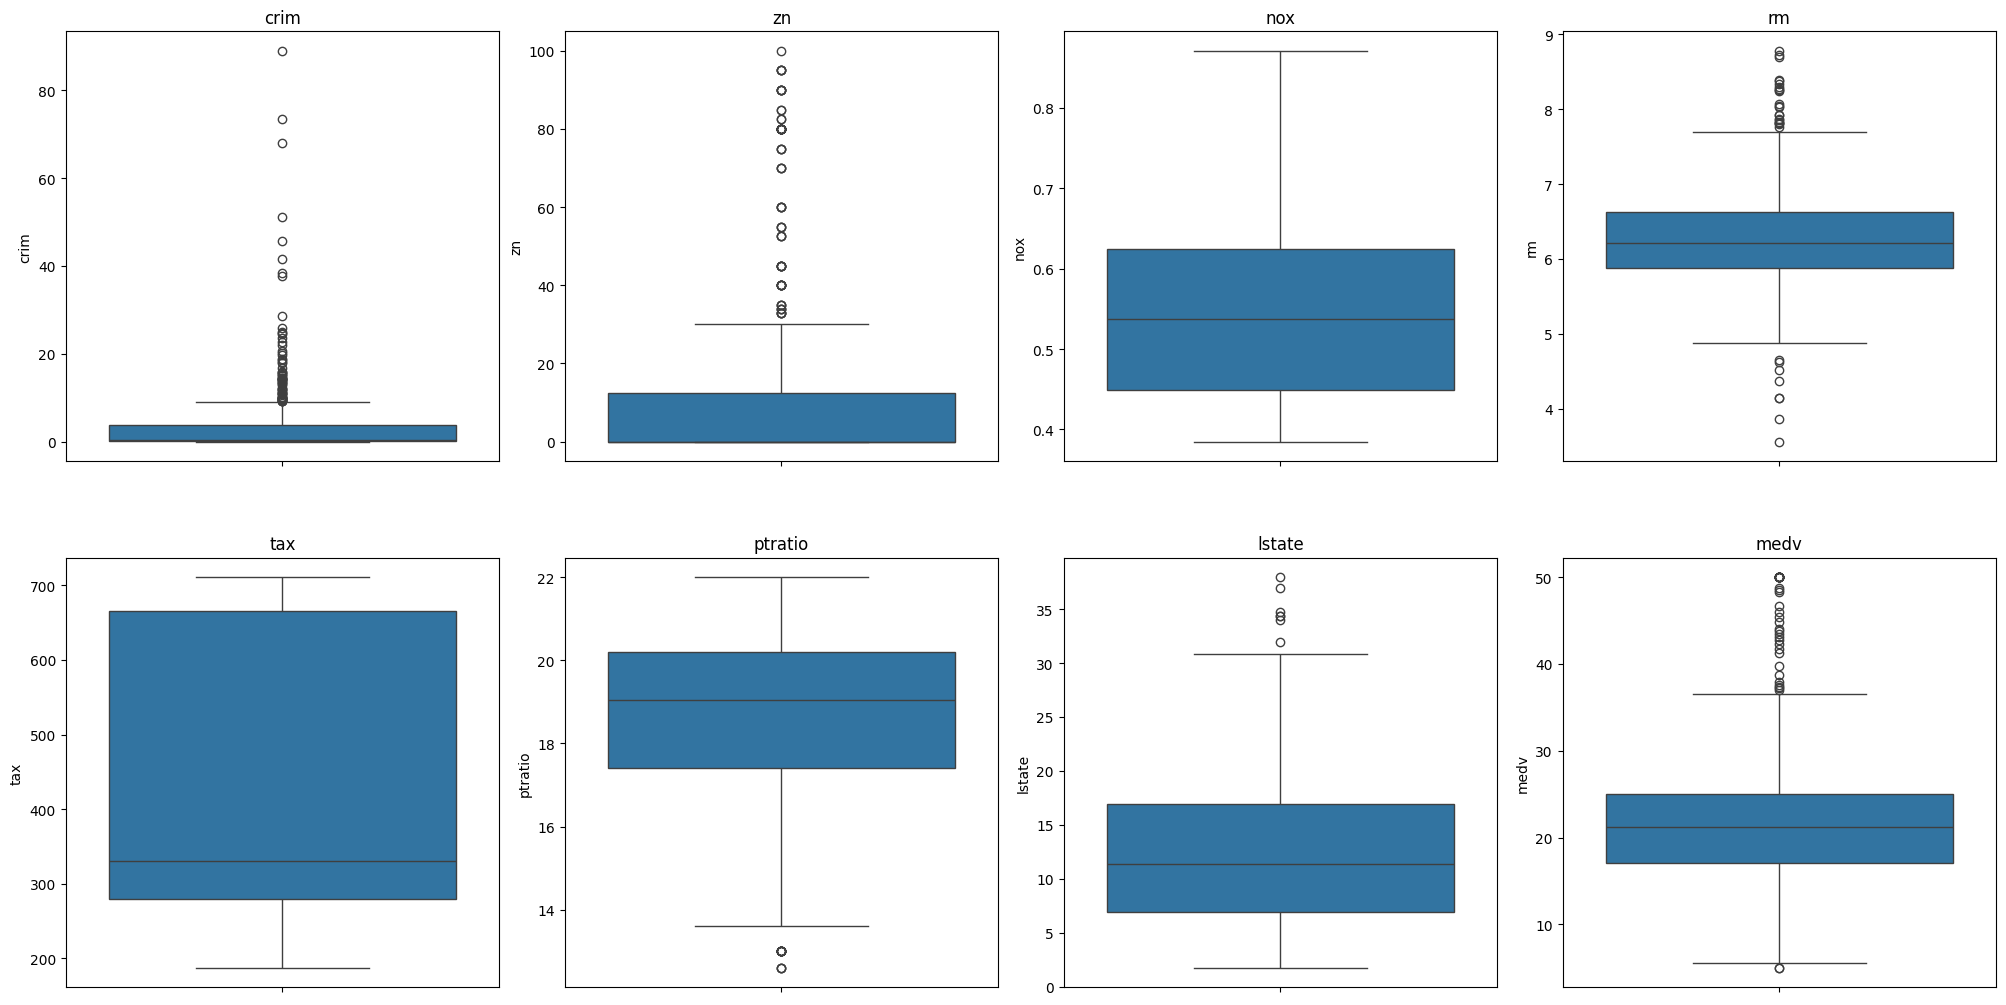

In [61]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

cols = price_df.drop(columns=['chas'])

for i, val in enumerate(cols):
    sns.boxplot(y=cols[val], ax=axes[i])
    axes[i].set_title(val)

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5)
plt.show()


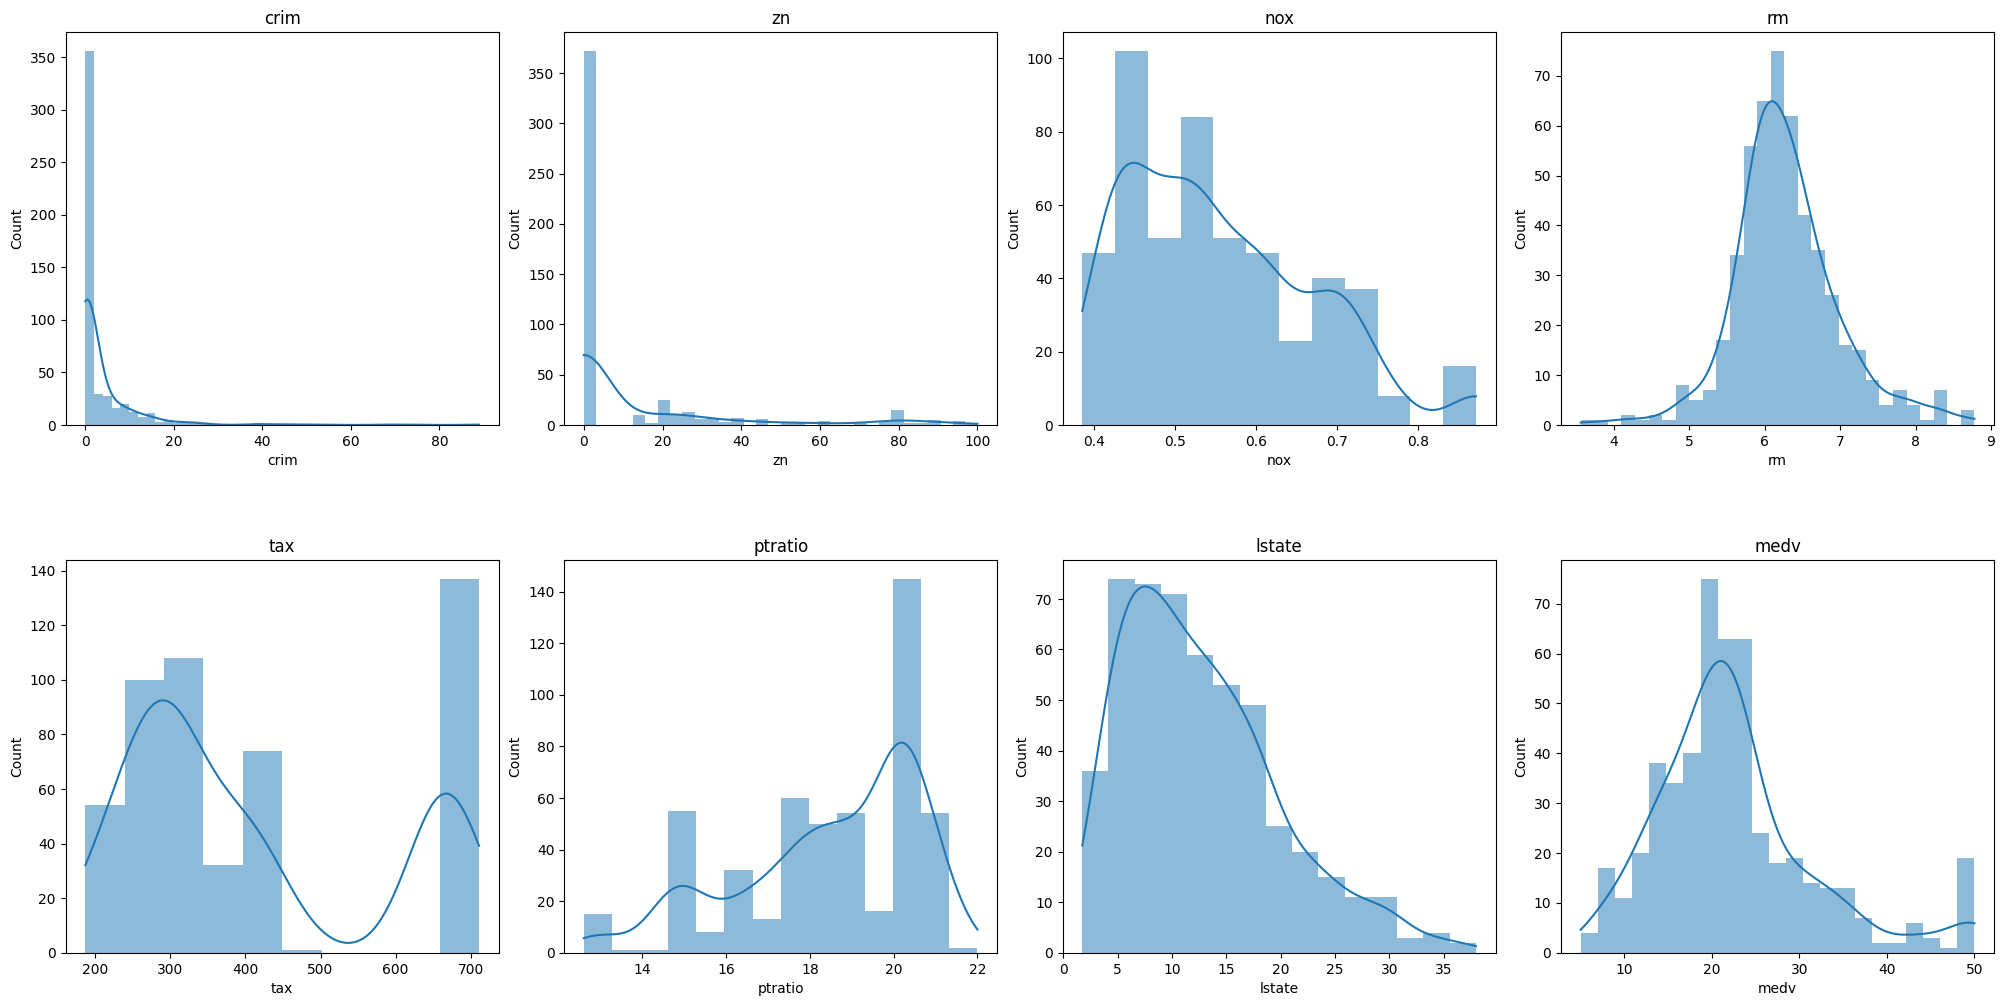

In [62]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

cols = price_df.drop(columns=['chas'])

for i, val in enumerate(cols):
    sns.histplot(x=cols[val], ax=axes[i], kde=True, edgecolor=None)
    axes[i].set_title(val)

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5)
plt.show()


In [63]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# X = price_df.drop(columns='medv')
# y = price_df['medv']

# cols_to_scale = X.columns.drop('chas')

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = price_df.drop(columns='medv')
y = price_df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from scipy.stats import boxcox

cols_with_outliers = ['crim', 'zn', 'lstate']
fitted_lambdas = {}

X_train_boxcox = X_train.copy()
X_test_boxcox = X_test.copy()
y_train_boxcox = y_train.copy()
y_test_boxcox = y_test.copy()

# for input cols
for col in cols_with_outliers:
    
    shift = 0
    min_val = X_train_boxcox[col].min()

    if min_val <= 0:
        shift = abs(min_val) + 0.001

    X_train_boxcox[col], fitted_lambda = boxcox(X_train_boxcox[col] + shift)
    fitted_lambdas[col] = fitted_lambda

    X_test_boxcox[col] = boxcox(X_test_boxcox[col] + shift, lmbda=fitted_lambda)

# for target col
y_shift = 0
if y_train_boxcox.min() <= 0:
    y_shift = abs(y_train_boxcox.min()) + 0.001

y_train_boxcox, fitted_lambda = boxcox(y_train_boxcox + y_shift)
y_test_boxcox = boxcox(y_test_boxcox + y_shift, lmbda= fitted_lambda)


In [66]:
cols_to_scale = X_train.columns.drop('chas')

scaler = StandardScaler()
X_train_scaled = X_train_boxcox.copy()
X_test_scaled = X_test_boxcox.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_boxcox[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_boxcox[cols_to_scale])

So our dataset had outliers which we have tried to avoid or remove. For this we first train test split as we dont want the boxcox based on the whole dataset we want it based on training data and want the test data to be unseen. After transformation we scaled so the dataset all are in same range, best for ML

In [87]:
import pickle

with open("train_test_split_price.pkl","wb") as f:
    pickle.dump((X_train_scaled, X_test_scaled, y_train_boxcox, y_test_boxcox, fitted_lambda, y_shift), f) 

## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.special import inv_boxcox
from numpy import sqrt

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_boxcox)

y_pred_lr = lr.predict(X_test_scaled)

score = r2_score(y_test_boxcox, y_pred_lr)
print("R2 Score ", score)

mse = mean_squared_error(y_test_boxcox, y_pred_lr)
print("Square Mean error", mse)


R2 Score  0.7388400807771162
Square Mean error 0.1467984071313915


The y_pred we are getting is from the boxcox. We want the original one medv for prediciting the actual one

In [69]:
y_pred_original = inv_boxcox(y_pred_lr, fitted_lambda) - y_shift
y_test_original = inv_boxcox(y_test_boxcox, fitted_lambda) - y_shift

r2_original = r2_score(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)

print(f"R2 Score (original scale): {r2_original:.4f}")
print(f"MSE (original scale): {mse_original:.4f}")


R2 Score (original scale): 0.7321
MSE (original scale): 19.6450


- Original y: [10 12 14 15 16 18 20 50]

- After Box-Cox → model learns on a transformed scale.

- Predictions on transformed scale → y_pred_lr

- After inv_boxcox: [10.54 11.56 12.83 14.46 16.64 19.72 24.46 32.84]

## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42, max_depth=7, min_samples_leaf =  5)
tree.fit(X_train_scaled, y_train_boxcox)

y_pred_tree = tree.predict(X_test_scaled)

y_pred_original = inv_boxcox(y_pred_tree, fitted_lambda) - y_shift
y_test_original = inv_boxcox(y_test_boxcox, fitted_lambda) - y_shift

In [71]:
r2_original = r2_score(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)

print(f"R2 score : {r2_original:.4f}")
print(f"MSE      : {mse_original:.4f}")
print(f"RMSE     : {rmse_original:.4f}")

R2 score : 0.7669
MSE      : 17.0952
RMSE     : 4.1346


In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [None, 3, 5, 7, 10],            
    "min_samples_split": [2, 5, 10],          
    "min_samples_leaf": [1, 2, 4, 5], 
}

dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters found: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.7297530582646682


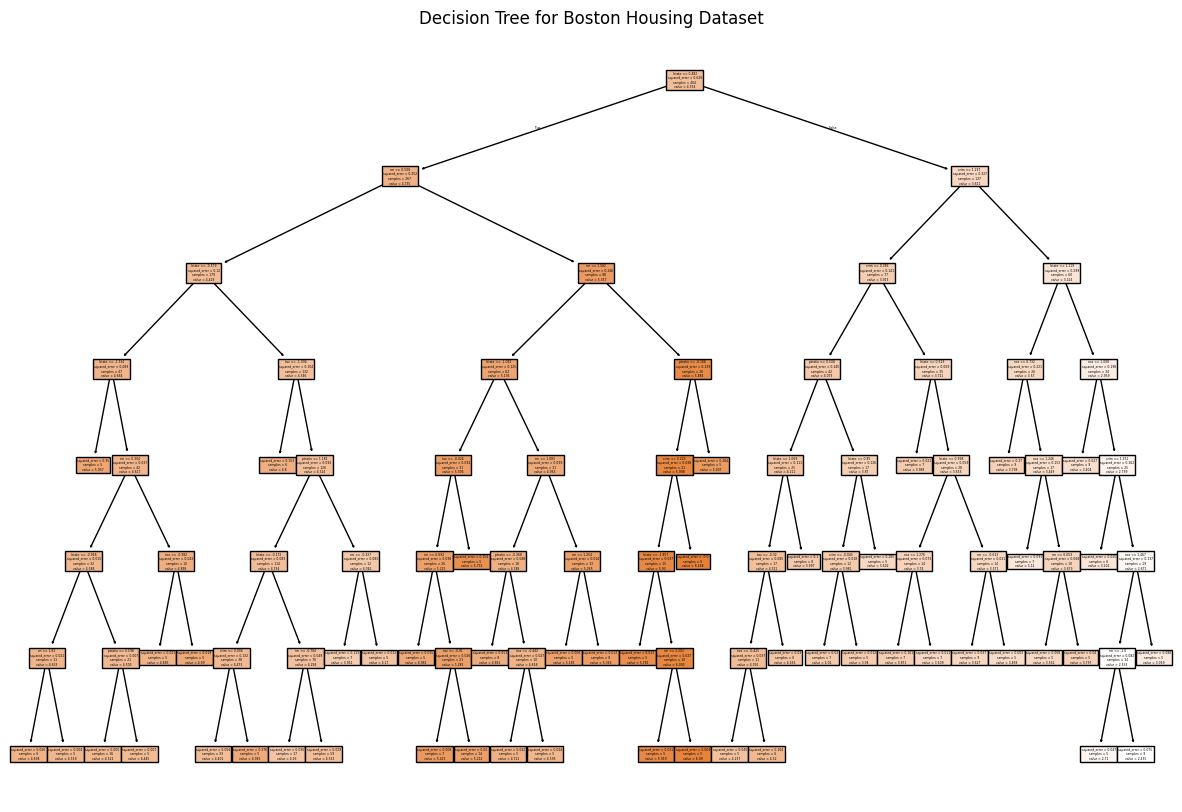

In [73]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(tree,  
          filled=True,
          feature_names=X.columns.tolist())
plt.title("Decision Tree for Boston Housing Dataset")
plt.show()

## KNN

In [74]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train_boxcox)

y_pred_knn = knn.predict(X_test_scaled)

y_pred_original_knn = inv_boxcox(y_pred_knn, fitted_lambda) - y_shift
y_test_original_knn = inv_boxcox(y_test_boxcox, fitted_lambda) - y_shift

r2_original = r2_score(y_test_original_knn, y_pred_original_knn)
mse_original = mean_squared_error(y_test_original_knn, y_pred_original_knn)
rmse_original = np.sqrt(mse_original)

print(f"R2 score : {r2_original:.4f}")
print(f"MSE      : {mse_original:.4f}")
print(f"MSE      : {rmse_original:.4f}")


R2 score : 0.7599
MSE      : 17.6074
MSE      : 4.1961


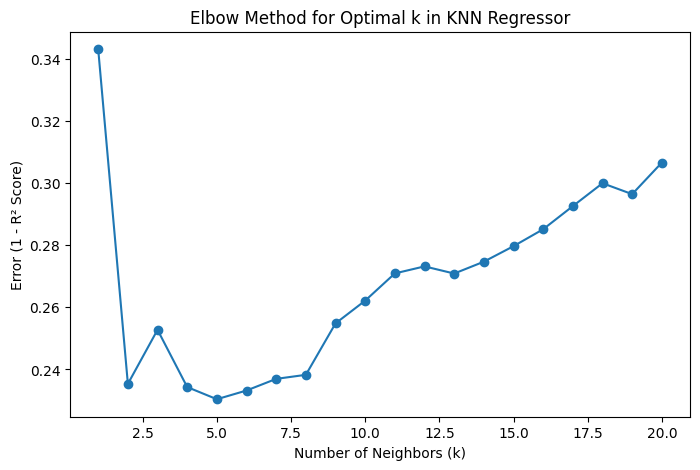

In [75]:
k_values = range(1, 21)
error_rate = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_boxcox)
    y_pred = knn.predict(X_test_scaled)
    error = 1 - r2_score(y_test_boxcox, y_pred)  
    error_rate.append(error)

plt.figure(figsize=(8,5))
plt.plot(k_values, error_rate, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error (1 - R² Score)") 
plt.title("Elbow Method for Optimal k in KNN Regressor") 
plt.show()

The upward trend after 5 means the model is underfitting

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    random_state= 42,
)

rf.fit(X_train_scaled, y_train_boxcox)
y_pred_rf = rf.predict(X_test_scaled)

y_pred_org = inv_boxcox(y_pred_rf, fitted_lambda) - y_shift
y_test_org = inv_boxcox(y_test_boxcox, fitted_lambda) - y_shift

r2_original = r2_score(y_test_org, y_pred_org)
mse_original = mean_squared_error(y_test_org, y_pred_org)
rmse_original = sqrt(mse_original)

print(f"Random Forest R2 Score : {r2_original:.4f}")
print(f"Random Forest MSE      : {mse_original:.4f}")
print(f"Random Forest RMSE     : {rmse_original:.4f}")

Random Forest R2 Score : 0.8684
Random Forest MSE      : 9.6482
Random Forest RMSE     : 3.1062


## Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.special import inv_boxcox
from numpy import sqrt

gbr = GradientBoostingRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train_scaled, y_train_boxcox)
y_pred_gbr = gbr.predict(X_test_scaled)

y_pred_org_gbr = inv_boxcox(y_pred_gbr, fitted_lambda) - y_shift
y_test_org_gbr = inv_boxcox(y_test_boxcox, fitted_lambda) - y_shift

r2_score_gbr = r2_score(y_test_org_gbr, y_pred_org_gbr)
mse_gbr = mean_squared_error(y_test_org_gbr, y_pred_org_gbr)
rmse_gbr = sqrt(mse_gbr)

print(f"Gradient Boosting R2 Score : {r2_score_gbr:.4f}")
print(f"Gradient Boosting MSE      : {mse_gbr:.4f}")        
print(f"Gradient Boosting RMSE     : {rmse_gbr:.4f}")


Gradient Boosting R2 Score : 0.8863
Gradient Boosting MSE      : 8.3365
Gradient Boosting RMSE     : 2.8873


MSE is better if we want to pentalize the large value but for understanding the rmse is better
- MSE useful for optimization
- RMSE is easier to interpret
- RMSER - 2.8 means its off by that '2.8' from the actual value

## KMEANS

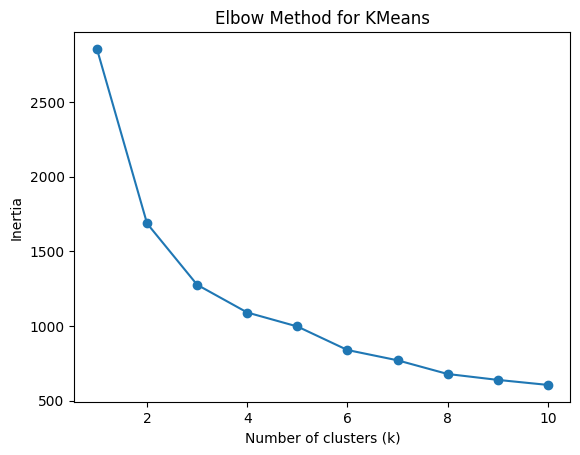

In [78]:
from sklearn.cluster import KMeans

X_features = X_train_scaled

inertia = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_features)
    inertia.append(km.inertia_) 

plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()


In [79]:
k_mean = KMeans(n_clusters=5, random_state=42)
k_mean.fit(X_features)

labels = k_mean.labels_

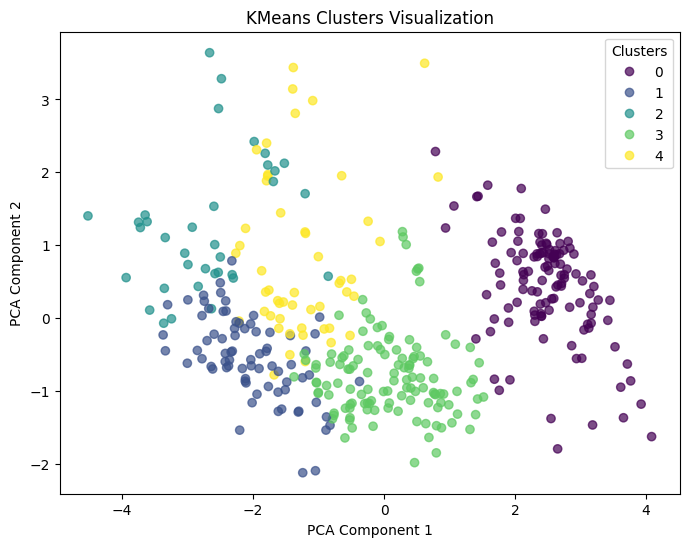

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_features)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clusters Visualization")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [81]:
import plotly.express as px
import pandas as pd

df_plot = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_plot['Cluster'] = labels
df_plot['Price'] = y_train.values 

fig = px.scatter(df_plot, x='PCA1', y='PCA2', color='Cluster',
                 size='Price', hover_data=['Price'],
                 title="Interactive KMeans Clusters")
fig.show()


## SVM

In [84]:
from sklearn.svm import SVR

svr = SVR(
    kernel='rbf',
    C=100, #regularization parameter
    epsilon=0.1 #margin of tolerance
)

svr.fit(X_train_scaled, y_train_boxcox)

y_pred_svr = svr.predict(X_test_scaled)

y_pred_org_svr = inv_boxcox(y_pred_svr, fitted_lambda) - y_shift
y_test_org_svr = inv_boxcox(y_test_boxcox, fitted_lambda) - y_shift

r2_score_svr = r2_score(y_test_org_svr, y_pred_org_svr)
mse_svr = mean_squared_error(y_test_org_svr, y_pred_org_svr)
rmse_svr = sqrt(mse_svr)

print(f"SVR R2 Score : {r2_score_svr:.4f}")
print(f"SVR MSE      : {mse_svr:.4f}")
print(f"SVR RMSE     : {rmse_svr:.4f}")

SVR R2 Score : 0.7808
SVR MSE      : 16.0747
SVR RMSE     : 4.0093
